# TASK 6.4: Supervised Machine Learning: Regression

#### 01 Import Data and Libraries
#### 02 Data Cleaning and Validation
#### 03 Data Prep for Regression Modelling
#### 04 Regression Analysis and Insights
#### 05 Findings

### 01 Import Data and Libraries

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn # contains various tools for machine learning, including algorithms, preprocessing utilities, and evaluation metric
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing subsets.
from sklearn.linear_model import LinearRegression # Enables predictions and analysis of the relationship between input features and the target.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Evaluate model's performance on the test data using RMSE & R² metrics

In [5]:
# Define the path

path = r'C:\Users\wallm'

In [6]:
# Import Supermarket Dataset

df_super = pd.read_csv(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '02 Data', 'Retail_Superstore_mapped.csv'))

### 02 Data Cleaning and Validation

In [8]:
# Inspect the data

df_super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Quantity,Discount,Profit,Profit_Outlier,Returned,Duplicate_Flag,Profit Margin (%),Year,Quarter,Month
0,1,US-2021-103800,2021-01-03,07/01/2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,2,0.2,5.55,Normal,0,Unique,33.75,2021,2021Q1,2021-01
1,2,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,2,0.8,-5.49,Normal,0,Unique,-155.00,2021,2021Q1,2021-01
2,3,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3,0.2,4.27,Normal,0,Unique,36.25,2021,2021Q1,2021-01
3,4,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3,0.2,-64.77,Outlier,0,Unique,-23.75,2021,2021Q1,2021-01
4,5,US-2021-141817,2021-01-05,12/01/2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,3,0.2,4.88,Normal,0,Unique,25.00,2021,2021Q1,2021-01


In [9]:
# Inspect the column names

df_super.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit_Outlier', 'Returned', 'Duplicate_Flag',
       'Profit Margin (%)', 'Year', 'Quarter', 'Month'],
      dtype='object')

In [10]:
# Check for missing values

df_super.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country/Region       0
City                 0
State/Province       0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Profit_Outlier       0
Returned             0
Duplicate_Flag       0
Profit Margin (%)    0
Year                 0
Quarter              0
Month                0
dtype: int64

In [11]:
# Look for duplicate rows and remove them if necessary

print(df_super.duplicated().sum())
df_super = df_super.drop_duplicates()

0


In [12]:
df_super.shape

(10068, 28)

##### Already removed 126 rows of extreme outliers in previous task from mean + sd*3, matching previous df of 10,068 rows

In [14]:
df_super.describe()

,Row ID,Sales,Quantity,Discount,Profit,Returned,Profit Margin (%),Year
count,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000
mean,5096.607569,190.870524,3.770858,0.154677,22.792197,0.078665,12.388357,2022.719805
std,2943.314102,370.237027,2.220183,0.204881,87.268926,0.269229,46.046878,1.125685
min,1.000000,0.440000,1.000000,0.000000,-694.290000,0.000000,-275.000000,2021.000000
25%,2552.750000,16.972500,2.000000,0.000000,1.760000,0.000000,7.500000,2022.000000
50%,5098.500000,51.970000,3.000000,0.200000,8.565000,0.000000,27.000000,2023.000000
75%,7645.250000,199.952500,5.000000,0.200000,28.620000,0.000000,36.250000,2024.000000
max,10194.000000,8187.650000,14.000000,0.800000,694.500000,1.000000,50.000000,2024.000000


### 03 Data Prep for Regression Modelling

#### Higher discount rates negatively impact profit margins. 
(H0 = There is no statistically significant relationship between discount rates and profit margin). 

##### Rationale: Offering higher discounts may reduce profit margins despite potentially increasing sales volume. 

This hypothesis can be assessed using regression analysis between the Discount and Profit columns.

Text(0.5, 1.0, 'Discount rates Vs Profit margin (%)')

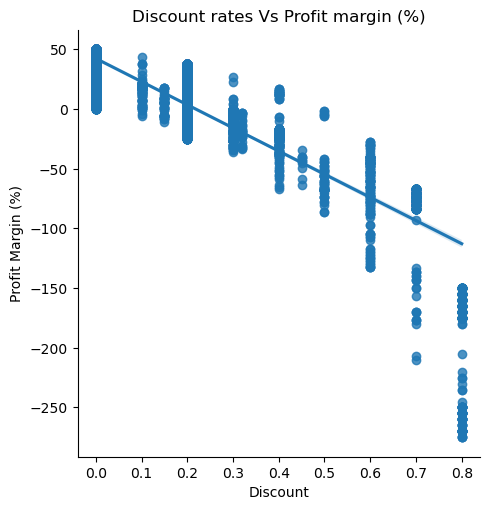

In [18]:
# Create a scatterplot for the "Discount rates" and "Profit Margin (%)" columns in seaborn

scat1 = sns.lmplot(x = 'Discount', y = 'Profit Margin (%)', data = df_super)
plt.title("Discount rates Vs Profit margin (%)")

#####  I can already see a general trend in the relationship between the two variables, with the regression line highlighting the overall negative trend, showing a steep downward slope as discount rates rise. I now need to use regression analysis, to then actually prove if it exists.

In [87]:
# Export scatterplot

scat1.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', 'scat1_discount_margin.png'))

In [20]:
#Reshape The variables we need into Numpy arrays and put them into separate objects

X = df_super['Discount'].values.reshape(-1,1) # X is standard to be a capital
y = df_super['Profit Margin (%)'].values.reshape(-1,1)

In [21]:
X

array([[0.2],
       [0.8],
       [0.2],
       ...,
       [0.2],
       [0. ],
       [0.2]])

In [22]:
y

array([[  33.75],
       [-155.  ],
       [  36.25],
       ...,
       [ -20.  ],
       [   3.  ],
       [ -20.  ]])

##### I first need to split each variable into a training and test set by using a built-in scikit-learn function, train_test_split():

In [24]:
# Split the data into a 'train-set' and a 'test-set' (using a built-in scikit-learn function):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # test_size 0.3 = 30% sample of the data

### 04 Regression Analysis and Insights

In [26]:
# Create a regression object

regression = LinearRegression() # this is the regression object we will fit into the training set

In [27]:
# Then, fit the regression into each training set

regression.fit(X_train, y_train) # Think of the regression object as an empty shell. You then fill it up with your training data

LinearRegression()

In [28]:
# Predict the values of y using x on the tests set

y_predicted = regression.predict(X_test)

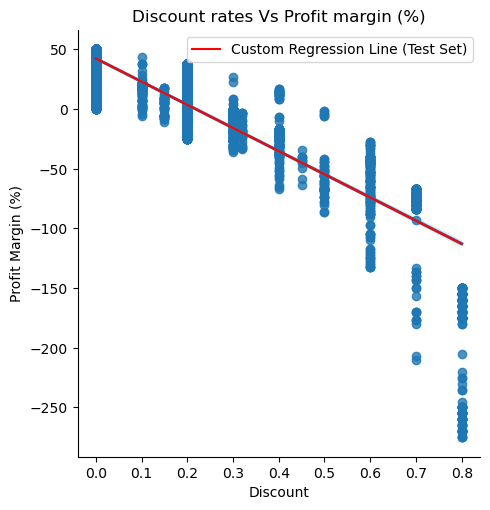

In [29]:
# Create the scatterplot using seaborn's lmplot
sns.lmplot(
    x='Discount',
    y='Profit Margin (%)',
    data=df_super
)

# Sort test data and predictions for smooth regression line
sorted_indices = X_test.flatten().argsort() # available in NumPy, provides the order of indices to sort the array.
X_test_sorted = X_test.flatten()[sorted_indices]
y_predicted_sorted = y_predicted[sorted_indices]

# Add the custom regression line using sorted test data
plt.plot(
    X_test_sorted,
    y_predicted_sorted,
    color='red',
    label='Custom Regression Line (Test Set)'
)

# Add labels, title, and legend
plt.title('Discount rates Vs Profit margin (%)')
plt.xlabel('Discount')
plt.ylabel('Profit Margin (%)')
plt.legend()

# Show the plot
plt.show()

##### This approach guarantees that the red regression line reflects the relationship between the test set’s X_test and the model’s predictions y_predicted.

##### In order to check the accuracy of the model, I need to check its performance in more ways than just visually. I can do this by checking some of the model’s summary statistics—namely, slope, root mean squared error, and r-squared value.

In [32]:
print('Slope:' ,regression.coef_) # coefficient that tells you how the y variable changes when X changes (negative = a negative relationship)

Slope: [[-194.1763933]]


##### The slope value from the regression coefficient (`regression.coef_`) indicates the rate of change in the dependent variable (Profit Margin (%)) for a one-unit increase in the independent variable (Discount). 
- The slope of **-194.18** means that for every 1-unit increase in Discount (e.g., from 0.1 to 0.2, or 10% to 20%), the Profit Margin (%) decreases by approximately 194.18% on average. 
- The negative value signifies a strong negative relationship, showing that higher discounts are associated with significantly lower profit margins.
- This steep slope highlights that even small increases in discounts can lead to substantial reductions in profitability.

##### However, while it does tell me the regression has a negative slope, it doesn’t actually tell you how well your model performed.

In [35]:
# Calculate the Root Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Use root mean squared error directly
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Updated calculation for Root Mean Squared Error
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# Calculate R-squared value
r2 = r2_score(y_test, y_predicted)

# Print the results
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Mean squared error:  22.77414016990064
R2 score:  0.7356983117636786


C:\Users\wallm\iCloudDrive\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Result:
- **MSE**: The smaller the MSE, the closer the model's predictions are to the actual values. In this case, an MSE of 22.77 suggests some prediction error, though the magnitude depends on the scale of your dependent variable.
- **R2**: This indicates that about 74% of the variance in the dependent variable (Profit Margin %) is explained by the independent variable (Discount). An R2 closer to 1 indicates a better fit. In this case, 0.74 suggests the model provides a reasonably good fit, but there is room for improvement.

#### Insight:
- The results indicate a statistically significant negative relationship between discount rates and profit margins.
- As the discount rate increases, the profit margin decreases substantially, which is supported by the regression slope of -194.18.
- This means that for every 1-unit increase in the discount rate (e.g., from 0.1 to 0.2 or 10% to 20%), the profit margin decreases by approximately 194 percentage points.

-With an R² score of 0.74, the model explains 74% of the variance in profit margin based on discount rates, further reinforcing the strength of this relationship. 

##### By comparing the actual values from the predicted values manually using my own eyes, I can verify for myself how far off or close the model is.

In [98]:
# Create a df comparing the real and the predicted values of y

data = pd.DataFrame({
    'Actual': y_test.flatten(),     # Flatten the y_test array 
    'Predicted': y_predicted.flatten()  # Flatten the y_predicted array
})

# Display the first 30 rows of the DataFrame
data.head(30)

,Actual,Predicted
0,46.000000,42.414113
1,-165.000000,-112.927002
2,33.000000,42.414113
3,11.250000,3.578834
4,17.000000,42.414113
5,36.250000,3.578834
6,35.000000,3.578834
7,-66.666667,-93.509363
8,7.500000,3.578834
9,8.000000,42.414113


#### I can see there’s quite a number of differences between the actual and predicted y values! Feels like i need a graph to display this better!

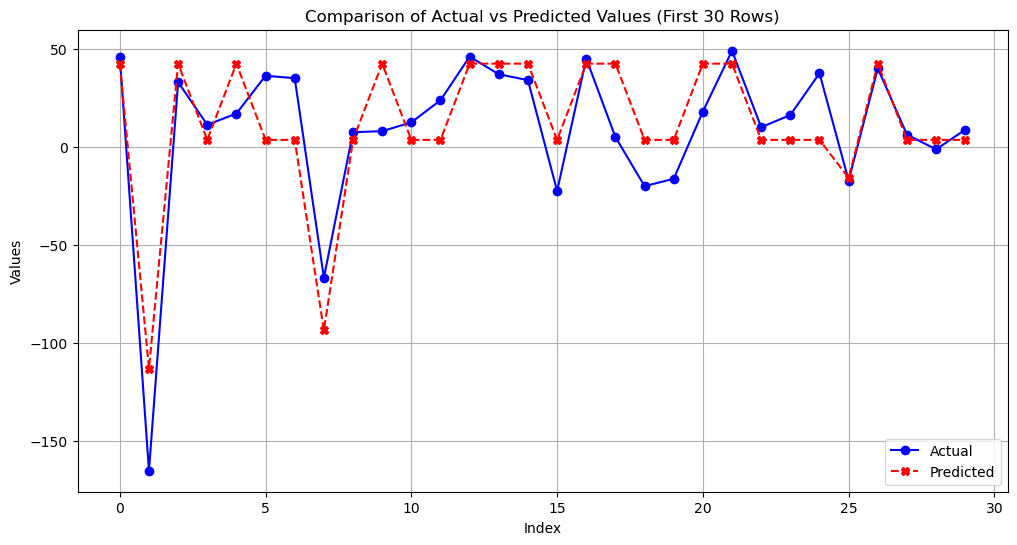

In [92]:
# Re-check the manual data by plotting the first 30 rows of actual vs predicted values

line1 = plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(data['Actual'][:30], label='Actual', marker='o', linestyle='-', color='blue')

# Plot predicted values
plt.plot(data['Predicted'][:30], label='Predicted', marker='X', linestyle='--', color='red')

# Add titles and labels
plt.title('Comparison of Actual vs Predicted Values (First 30 Rows)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [94]:
# Export line chart

line1.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', 'line1_predict_actual_sns.png'))

#### Insight:
- The predicted values (red) generally follow the same trend as the actual values (blue), indicating the model captures the overall pattern of the data.
- There are noticeable deviations between the actual and predicted values at specific indices, particularly at the extremes (e.g., rows 0, 7, and 15).

- This indicates the model struggles to accurately predict outliers or extreme values
- But, the predicted values stay relatively close to the actual values, showing that the model has a reasonable fit for the majority of the data.
- The alignment between the two lines suggests the model performs adequately, though there are areas for improvement, especially in handling more extreme variations in the actual values.

#### Reflections on Data Bias: 

The performance of the model might also be influenced by possible biases:

- Skewed Data Distribution: If the dataset contains an uneven representation of discount rates or profit margins (e.g., more data points for small discounts and fewer for higher discounts), the model may not generalize well across the entire range.
- Outliers: Extreme values in the dataset could disproportionately affect the model's training and evaluation, leading to less accurate predictions for such cases.
- Feature Relationships: If certain features influencing profit margins (e.g., product category, region) are not included in the dataset, the model may produce biased predictions by overemphasizing the discount rate.

Addressing these biases by analyzing and balancing the dataset, or including additional relevant features, could improve the model's performance and make it more robust.

### 05 Findings

### Final Findings and Insight:

#### Model Performance on the Test Set

- The model performed reasonably well on the test set, as evidenced by the graph comparing actual and predicted values.
- The predictions (red dashed line) generally follow the same trend as the actual values (blue line), which suggests the model captures the overall relationship between the features and the target variable.
- However, there are noticeable discrepancies, particularly at the extremes (e.g., rows 0, 7, and 15), where the model fails to predict outliers accurately.
- This indicates that while the model works well for the majority of the data, it struggles with edge cases.

- The negative slope value of **-194.18** signifies a strong negative relationship, showing that higher discounts are associated with significantly lower profit margins.
- The R² score of **0.74** reflects that the model explains 74% of the variance in the dependent variable (Profit Margin %) based on the independent variable (Discount).
- However, the **Root Mean Squared Error (RMSE)** of 22.77 suggests there is still room for improvement, as the average prediction error is relatively high.

- The graph and metrics demonstrate that the relationship between discount rates and profit margins is not random.

#### Hypothesis conclusion:

Therefore, I reject the null hypothesis (H₀) and conclude that higher discount rates significantly and negatively impact profit margins. The results provide sufficient evidence to conclude that higher discount rates negatively impact profit margins.